In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
import scipy
import copy
import cvxpy
import os

# 2. EV Profiles

In [2]:
def plot(ax, load_segments_array, load_segments_dict, save_str=None, legend=False, include_in_legend=[], xlabel=False, penlevel=1.0, yticks=None):
    colours = {'Residential L1': '#bf812d', 'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    segment_names = {'Residential L2': 'SFH L2', 'MUD L2': 'MUD L2', 'Workplace L2': 'Work L2', 'Public L2': 'Public L2', 'Public DCFC': 'Public L3'}
    patterns = {'Residential L2':'/', 'MUD L2':'///', 'Workplace L2':'\\', 'Public L2':'x', 'Public DCFC':'.'}
    
    x = (1/60)*np.arange(0, 1440)
    mark = np.zeros(np.shape(x))
    scaling = (1 / 1000) * (1 / 1000)
    unit = 'GW'
    lines_all = {}
    for key, val in load_segments_dict.items():
        if key != 'Residential L1':
            ax.plot(x, penlevel * scaling * (mark + val), color=colours[key])
            if key in include_in_legend:
                ax.fill_between(x, penlevel * scaling * mark, penlevel * scaling * (mark + val), label=segment_names[key], facecolor=colours[key], hatch=patterns[key], edgecolor='grey')
            else:
                ax.fill_between(x, penlevel * scaling * mark, penlevel * scaling * (mark + val), facecolor=colours[key], hatch=patterns[key], edgecolor='grey')
            mark += val
    ax.plot(x, penlevel * scaling * mark, 'k')
    if legend:
        ax.legend(fontsize=10, loc='upper left')
    ax.set_xlim([0, np.max(x)])
    if xlabel:
        ax.set_xlabel('Time of Day [h]', fontsize=10)
    if yticks is not None:
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks, fontsize=10)
    ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21, 24], fontsize=10)
    
    return ax

In [3]:
def plot2(ax, load_segments_array, load_segments_dict, save_str=None, legend=False, include_in_legend=[], xlabel=False, penlevel=1.0, yticks=None):
    colours = {'Residential L1': '#bf812d', 'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    segment_names = {'Residential L2': 'SFH L2', 'MUD L2': 'MUD L2', 'Workplace L2': 'Work L2', 'Public L2': 'Public L2', 'Public DCFC': 'Public L3'}
    patterns = {'Residential L2':'/', 'MUD L2':'///', 'Workplace L2':'\\', 'Public L2':'x', 'Public DCFC':'.'}
    
    x = (1/4)*np.arange(0, 96)
    mark = np.zeros(np.shape(x))
    scaling = (1 / 1000) * (1 / 1000)
    unit = 'GW'
    lines_all = {}
    for key, val in load_segments_dict.items():
        if key != 'Residential L1':
            ax.plot(x, penlevel * scaling * (mark + val), color=colours[key])
            if key in include_in_legend:
                ax.fill_between(x, penlevel * scaling * mark, penlevel * scaling * (mark + val), label=segment_names[key], facecolor=colours[key], hatch=patterns[key], edgecolor='grey')
            else:
                ax.fill_between(x, penlevel * scaling * mark, penlevel * scaling * (mark + val), facecolor=colours[key], hatch=patterns[key], edgecolor='grey')
            mark += val
    ax.plot(x, penlevel * scaling * mark, 'k')
    if legend:
        ax.legend(fontsize=10, loc='upper left')
    ax.set_xlim([0, np.max(x)])
    if xlabel:
        ax.set_xlabel('Time of Day [h]', fontsize=10)
    if yticks is not None:
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks, fontsize=10)
    ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21, 24], fontsize=10)
    
    return ax

In [4]:
date = '20240208'
plot_year = '2035'
folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_'+date+'/'
uncont = pd.read_csv(folder3 + 'flat_block_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder3+'noblock_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
# prof1a_v2 = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
(uncont.total_incl_noncombustion.sum() - ref.total_incl_noncombustion.sum()) / uncont.total_incl_noncombustion.sum()

0.05151736459692942

In [5]:
(uncont.total_incl_noncombustion.sum() - ref.total_incl_noncombustion.sum()) 

44241707.074561715

In [6]:
(uncont.total_incl_noncombustion.sum() - ref.total_incl_noncombustion.sum())  / (365*24)

5050.423182027593

In [2]:
date = '20240208'
plot_year = '2028'

In [5]:
# folder3 = 'Results_AEFMEF_storagebefore_bigstoragenewgrid_redo_20230824/'
folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_'+date+'/'
uncont = pd.read_csv(folder3 + 'flat_block_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder3+'noblock_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a_v2 = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']


In [6]:
folder1 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_outputs_'+date+'/'
folder1a = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_'+date+'/'
folder2 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_MRMEF_outputs_'+date+'/'
cont=pd.read_csv(folder1+'controlled_block_AEF_weekdayweekend__year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
uncont=pd.read_csv(folder1a+'flat_block_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder1a+'noblock_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
prof2a = cont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont2=pd.read_csv(folder1+'controlled_block_MEF_weekdayweekend__year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
prof3a = cont2.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont3 = pd.read_csv(folder2+'controlled_block_MRMEF_delta10000_5yearsahead_weekdayweekend_year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
prof4a = cont3.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']

In [7]:
# folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_outputs_20230728/'
folder3a = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_'+date+'/'
folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_outputs_'+date+'/'
folder4 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_MRMEF_outputs_CO2_'+date+'/'
cont=pd.read_csv(folder3+'controlled_block_AEF_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
uncont=pd.read_csv(folder3a+'flat_block_year'+plot_year+'_co2price_01dolperkg_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder3a+'noblock_year'+plot_year+'_co2price_01dolperkg_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a_co2 = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
prof2a_co2 = cont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont2=pd.read_csv(folder3+'controlled_block_MEF_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
prof3a_co2 = cont2.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont3_co2 = pd.read_csv(folder4+'controlled_block_MRMEF_delta10000_5yearsahead_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
prof4a_co2 = cont3.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']

In [8]:
prof1 = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_UniversalHome_100p_weekday_'+date+'.csv', index_col=0)
prof2 = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3 = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4 = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)

In [9]:
prof1b = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_HighHome_100p_weekday_'+date+'.csv', index_col=0)
prof2b = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3b = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4b = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_HighHome_100p_nonreg_'+date+'.csv', index_col=0)

In [10]:
prof1c = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_LowHome_HighWork_100p_weekday_'+date+'.csv', index_col=0)
prof2c = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof3c = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof4c = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)

In [11]:
ev_add_scaling = {2019:0.01, 2035:0.5}
m = (ev_add_scaling[2035] - ev_add_scaling[2019]) / (2035-2019)
for year in np.arange(2020, 2038):
    ev_add_scaling[int(year)] = ev_add_scaling[2019] + m * (year - 2019)


In [12]:
ev_add_scaling[2028]

0.285625

In [13]:
ev_add_scaling[2030]

0.346875

In [14]:
# prof1 = pd.read_csv('Data/EVProfiles/uncontrolled_15min_UniversalHome_100p_weekday_20230824.csv', index_col=0)
prof2_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)

In [15]:
# prof1b = pd.read_csv('Data/EVProfiles/uncontrolled_15min_HighHome_100p_weekday_20230824.csv', index_col=0)
prof2b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_HighHome_100p_nonreg_'+date+'.csv', index_col=0)

In [16]:
# prof1c = pd.read_csv('Data/EVProfiles/uncontrolled_15min_LowHome_HighWork_100p_weekday_20230824.csv', index_col=0)
prof2c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof3c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof4c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)

# New

In [17]:
plot_year

'2028'

In [18]:
prof2a.values.sum()*(1/1000)
prof2b.values.sum()*(1/4)*ev_add_scaling[int(plot_year)]*(1/1000)*(1/1000)
prof2c.values.sum()*(1/4)*ev_add_scaling[int(plot_year)]*(1/1000)*(1/1000)
prof2.values.sum()*(1/4)*ev_add_scaling[int(plot_year)]*(1/1000)*(1/1000)


75.46690230657164

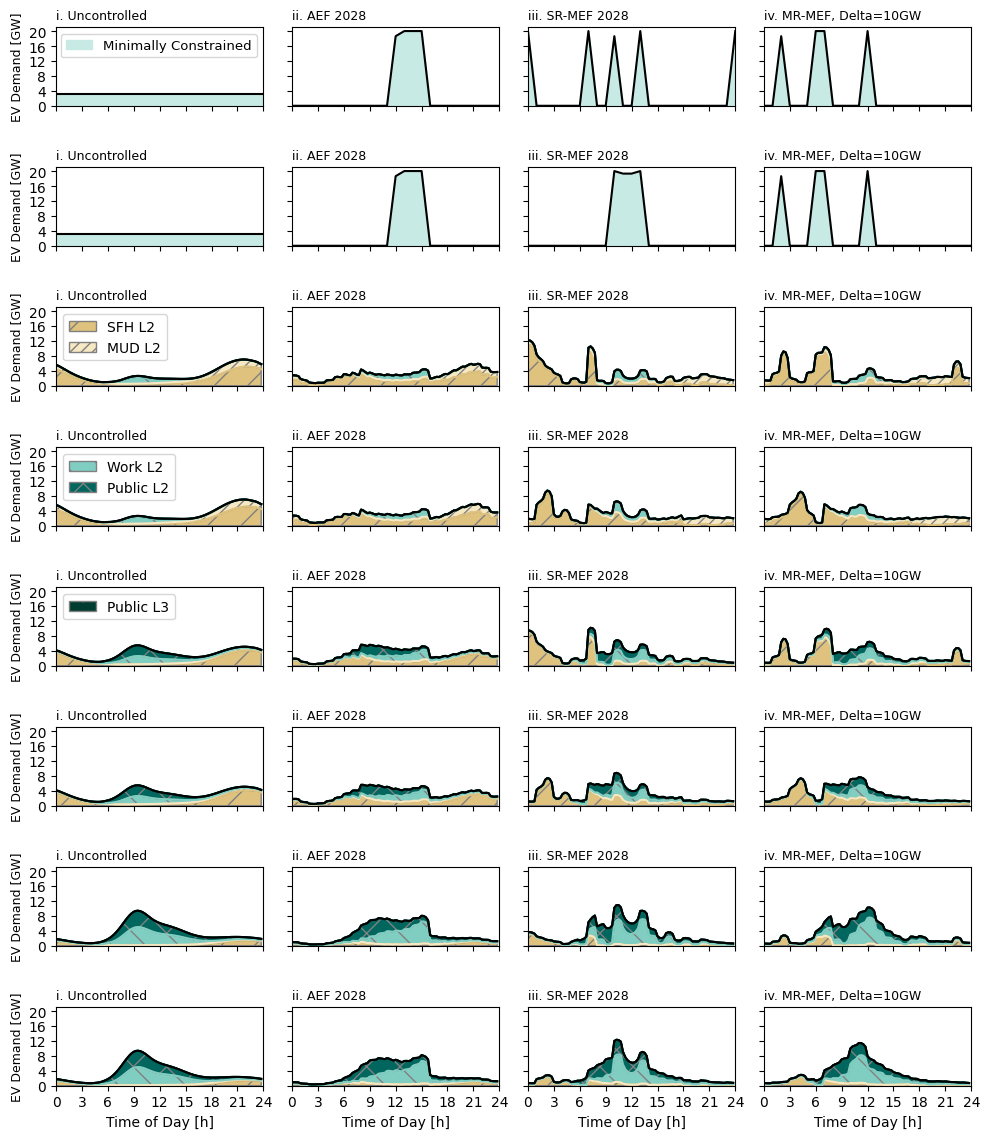

In [18]:
fig, axes = plt.subplots(8, 4, figsize=(10, 11.5), sharey=True, sharex=True)
c1 = '#c7eae5'
axes[0, 0].plot(np.arange(0, 25), (1/1000)*prof1a.values, color='k')#, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[2030], yticks=np.arange(0, 16, 2))
axes[0, 0].fill_between(np.arange(0, 25), 0, (1/1000)*prof1a.values, color=c1, label='Minimally Constrained')

fs=9
axes[0, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[0, 0].legend(fontsize=9.5)
axes[0, 1].plot(np.arange(0, 25), (1/1000)*prof2a.values, color='k')
axes[0, 1].fill_between(np.arange(0, 25), 0, (1/1000)*prof2a.values, color=c1)
axes[0, 2].plot(np.arange(0, 25), (1/1000)*prof3a.values, color='k')
axes[0, 2].fill_between(np.arange(0, 25), 0, (1/1000)*prof3a.values, color=c1)
axes[0, 3].plot(np.arange(0, 25), (1/1000)*prof4a.values, color='k')
axes[0, 3].fill_between(np.arange(0, 25), 0, (1/1000)*prof4a.values, color=c1)

axes[2, 0] = plot2(axes[2, 0], prof1.values, prof1, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[2, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[2, 1] = plot2(axes[2, 1], prof2.values, prof2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[2, 2] = plot2(axes[2, 2], prof3.values, prof3, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[2, 3] = plot2(axes[2, 3], prof4.values, prof4, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[4, 0] = plot2(axes[4, 0], prof1b.values, prof1b, legend=True, include_in_legend=['Public DCFC'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))#, 'Public DCFC'])
axes[4, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[4, 1] = plot2(axes[4, 1], prof2b.values, prof2b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[4, 2] = plot2(axes[4, 2], prof3b.values, prof3b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[4, 3] = plot2(axes[4, 3], prof4b.values, prof4b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[6, 0] = plot2(axes[6, 0], prof1c.values, prof1c, legend=False, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[6, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[6, 1] = plot2(axes[6, 1], prof2c.values, prof2c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[6, 2] = plot2(axes[6, 2], prof3c.values, prof3c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[6, 3] = plot2(axes[6, 3], prof4c.values, prof4c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

for i in range(8):
    axes[i, 0].set_title('i. Uncontrolled', fontsize=9, loc='left')
    axes[i, 1].set_title('ii. AEF '+str(plot_year), fontsize=9, loc='left')
    axes[i, 2].set_title('iii. SR-MEF '+str(plot_year), fontsize=9, loc='left')
    axes[i, 3].set_title('iv. MR-MEF, Delta=10GW', fontsize=9, loc='left')


axes[1, 0].plot(np.arange(0, 25), (1/1000)*prof1a_co2.values, color='k')#, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[2030], yticks=np.arange(0, 16, 2))
axes[1, 0].fill_between(np.arange(0, 25), 0, (1/1000)*prof1a_co2.values, color=c1, label='Minimally Constrained')
axes[1, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
# axes[1, 0].legend(fontsize=9.5)
axes[1, 1].plot(np.arange(0, 25), (1/1000)*prof2a_co2.values, color='k')
axes[1, 1].fill_between(np.arange(0, 25), 0, (1/1000)*prof2a_co2.values, color=c1)
axes[1, 2].plot(np.arange(0, 25), (1/1000)*prof3a_co2.values, color='k')
axes[1, 2].fill_between(np.arange(0, 25), 0, (1/1000)*prof3a_co2.values, color=c1)
axes[1, 3].plot(np.arange(0, 25), (1/1000)*prof4a_co2.values, color='k')
axes[1, 3].fill_between(np.arange(0, 25), 0, (1/1000)*prof4a_co2.values, color=c1)

axes[3, 0] = plot2(axes[3, 0], prof1.values, prof1, legend=True, include_in_legend=['Workplace L2', 'Public L2'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[3, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[3, 1] = plot2(axes[3, 1], prof2_co2.values, prof2_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[3, 2] = plot2(axes[3, 2], prof3_co2.values, prof3_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[3, 3] = plot2(axes[3, 3], prof4_co2.values, prof4_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[5, 0] = plot2(axes[5, 0], prof1b.values, prof1b, legend=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))#, 'Public DCFC'])
axes[5, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[5, 1] = plot2(axes[5, 1], prof2b_co2.values, prof2b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[5, 2] = plot2(axes[5, 2], prof3b_co2.values, prof3b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[5, 3] = plot2(axes[5, 3], prof4b_co2.values, prof4b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[7, 0] = plot2(axes[7, 0], prof1c.values, prof1c, legend=False, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[7, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[7, 1] = plot2(axes[7, 1], prof2c_co2.values, prof2c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[7, 2] = plot2(axes[7, 2], prof3c_co2.values, prof3c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[7, 3] = plot2(axes[7, 3], prof4c_co2.values, prof4c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))


axes[0, 2].set_ylim(bottom=0)

plt.tight_layout(h_pad=2.5)
plt.savefig('../Figures/all_charging_profiles_'+plot_year+'_v2_'+date+'.png', bbox_inches='tight')
plt.savefig('../Figures/all_charging_profiles_'+plot_year+'_v2_'+date+'.pdf', bbox_inches='tight')
plt.show()

In [21]:
date = '20240208'
plot_year = '2033'

# folder3 = 'Results_AEFMEF_storagebefore_bigstoragenewgrid_redo_20230824/'
folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_'+date+'/'
uncont = pd.read_csv(folder3 + 'flat_block_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder3+'noblock_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a_v2 = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
folder1 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_outputs_'+date+'/'
folder1a = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_'+date+'/'
folder2 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_MRMEF_outputs_'+date+'/'
cont=pd.read_csv(folder1+'controlled_block_AEF_weekdayweekend__year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
uncont=pd.read_csv(folder1a+'flat_block_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder1a+'noblock_year'+plot_year+'_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
prof2a = cont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont2=pd.read_csv(folder1+'controlled_block_MEF_weekdayweekend__year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
prof3a = cont2.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont3 = pd.read_csv(folder2+'controlled_block_MRMEF_delta10000_5yearsahead_weekdayweekend_year'+plot_year+'_withstorage_dpdf_'+date+'.csv')
prof4a = cont3.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
# folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_outputs_20230728/'
folder3a = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_'+date+'/'
folder3 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_AEFMEF_CO2_outputs_'+date+'/'
folder4 = '/Volumes/mtec_nas_sustec_energydb/Siobhan/LRMEF/Results_MRMEF_outputs_CO2_'+date+'/'
cont=pd.read_csv(folder3+'controlled_block_AEF_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
uncont=pd.read_csv(folder3a+'flat_block_year'+plot_year+'_co2price_01dolperkg_storagebefore_withstorage_dpdf_'+date+'.csv')
ref=pd.read_csv(folder3a+'noblock_year'+plot_year+'_co2price_01dolperkg_storagebefore_withstorage_dpdf_'+date+'.csv')
prof1a_co2 = uncont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
prof2a_co2 = cont.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont2=pd.read_csv(folder3+'controlled_block_MEF_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
prof3a_co2 = cont2.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']
cont3_co2 = pd.read_csv(folder4+'controlled_block_MRMEF_delta10000_5yearsahead_weekdayweekend_year'+plot_year+'_co2price_01dolperkg_withstorage_dpdf_'+date+'.csv')
prof4a_co2 = cont3.loc[0:24, 'total_incl_noncombustion'] - ref.loc[0:24, 'total_incl_noncombustion']

prof1 = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_UniversalHome_100p_weekday_'+date+'.csv', index_col=0)
prof2 = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3 = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4 = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof1b = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_HighHome_100p_weekday_'+date+'.csv', index_col=0)
prof2b = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3b = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4b = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof1c = pd.read_csv('../Data/EVProfiles/uncontrolled_15min_LowHome_HighWork_100p_weekday_'+date+'.csv', index_col=0)
prof2c = pd.read_csv('../Data/EVProfiles/controlled_15min_AEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof3c = pd.read_csv('../Data/EVProfiles/controlled_15min_MEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof4c = pd.read_csv('../Data/EVProfiles/controlled_15min_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
# prof1 = pd.read_csv('Data/EVProfiles/uncontrolled_15min_UniversalHome_100p_weekday_20230824.csv', index_col=0)
prof2_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_UniversalHome_100p_nonreg_'+date+'.csv', index_col=0)
# prof1b = pd.read_csv('Data/EVProfiles/uncontrolled_15min_HighHome_100p_weekday_20230824.csv', index_col=0)
prof2b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof3b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
prof4b_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_HighHome_100p_nonreg_'+date+'.csv', index_col=0)
# prof1c = pd.read_csv('Data/EVProfiles/uncontrolled_15min_LowHome_HighWork_100p_weekday_20230824.csv', index_col=0)
prof2c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_AEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof3c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MEF_weekday_'+plot_year+'_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)
prof4c_co2 = pd.read_csv('../Data/EVProfiles/controlled_15min_co2_MRMEF_delta10000_startyear'+plot_year+'_5yearsahead_weekday_LowHome_HighWork_100p_nonreg_'+date+'.csv', index_col=0)

In [22]:
plot_year

'2033'

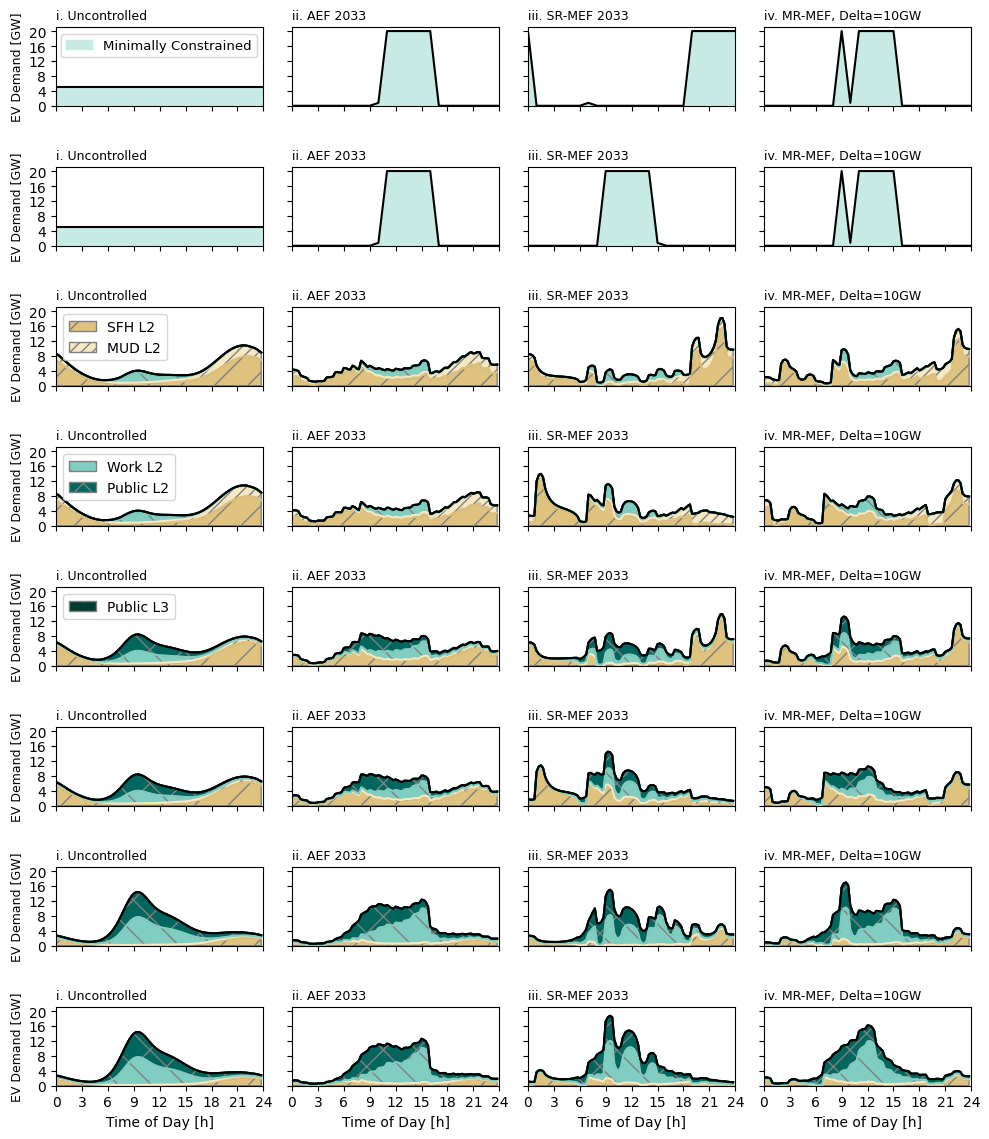

In [23]:
fig, axes = plt.subplots(8, 4, figsize=(10, 11.5), sharey=True, sharex=True)
c1 = '#c7eae5'
axes[0, 0].plot(np.arange(0, 25), (1/1000)*prof1a.values, color='k')#, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[2030], yticks=np.arange(0, 16, 2))
axes[0, 0].fill_between(np.arange(0, 25), 0, (1/1000)*prof1a.values, color=c1, label='Minimally Constrained')

fs=9
axes[0, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[0, 0].legend(fontsize=9.5)
axes[0, 1].plot(np.arange(0, 25), (1/1000)*prof2a.values, color='k')
axes[0, 1].fill_between(np.arange(0, 25), 0, (1/1000)*prof2a.values, color=c1)
axes[0, 2].plot(np.arange(0, 25), (1/1000)*prof3a.values, color='k')
axes[0, 2].fill_between(np.arange(0, 25), 0, (1/1000)*prof3a.values, color=c1)
axes[0, 3].plot(np.arange(0, 25), (1/1000)*prof4a.values, color='k')
axes[0, 3].fill_between(np.arange(0, 25), 0, (1/1000)*prof4a.values, color=c1)

axes[2, 0] = plot2(axes[2, 0], prof1.values, prof1, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[2, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[2, 1] = plot2(axes[2, 1], prof2.values, prof2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[2, 2] = plot2(axes[2, 2], prof3.values, prof3, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[2, 3] = plot2(axes[2, 3], prof4.values, prof4, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[4, 0] = plot2(axes[4, 0], prof1b.values, prof1b, legend=True, include_in_legend=['Public DCFC'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))#, 'Public DCFC'])
axes[4, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[4, 1] = plot2(axes[4, 1], prof2b.values, prof2b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[4, 2] = plot2(axes[4, 2], prof3b.values, prof3b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[4, 3] = plot2(axes[4, 3], prof4b.values, prof4b, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[6, 0] = plot2(axes[6, 0], prof1c.values, prof1c, legend=False, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[6, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[6, 1] = plot2(axes[6, 1], prof2c.values, prof2c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[6, 2] = plot2(axes[6, 2], prof3c.values, prof3c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[6, 3] = plot2(axes[6, 3], prof4c.values, prof4c, xlabel=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

for i in range(8):
    axes[i, 0].set_title('i. Uncontrolled', fontsize=9, loc='left')
    axes[i, 1].set_title('ii. AEF '+str(plot_year), fontsize=9, loc='left')
    axes[i, 2].set_title('iii. SR-MEF '+str(plot_year), fontsize=9, loc='left')
    axes[i, 3].set_title('iv. MR-MEF, Delta=10GW', fontsize=9, loc='left')


axes[1, 0].plot(np.arange(0, 25), (1/1000)*prof1a_co2.values, color='k')#, legend=True, include_in_legend=['Residential L2', 'MUD L2'], penlevel=ev_add_scaling[2030], yticks=np.arange(0, 16, 2))
axes[1, 0].fill_between(np.arange(0, 25), 0, (1/1000)*prof1a_co2.values, color=c1, label='Minimally Constrained')
axes[1, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
# axes[1, 0].legend(fontsize=9.5)
axes[1, 1].plot(np.arange(0, 25), (1/1000)*prof2a_co2.values, color='k')
axes[1, 1].fill_between(np.arange(0, 25), 0, (1/1000)*prof2a_co2.values, color=c1)
axes[1, 2].plot(np.arange(0, 25), (1/1000)*prof3a_co2.values, color='k')
axes[1, 2].fill_between(np.arange(0, 25), 0, (1/1000)*prof3a_co2.values, color=c1)
axes[1, 3].plot(np.arange(0, 25), (1/1000)*prof4a_co2.values, color='k')
axes[1, 3].fill_between(np.arange(0, 25), 0, (1/1000)*prof4a_co2.values, color=c1)

axes[3, 0] = plot2(axes[3, 0], prof1.values, prof1, legend=True, include_in_legend=['Workplace L2', 'Public L2'], penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[3, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[3, 1] = plot2(axes[3, 1], prof2_co2.values, prof2_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[3, 2] = plot2(axes[3, 2], prof3_co2.values, prof3_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[3, 3] = plot2(axes[3, 3], prof4_co2.values, prof4_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[5, 0] = plot2(axes[5, 0], prof1b.values, prof1b, legend=False, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))#, 'Public DCFC'])
axes[5, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[5, 1] = plot2(axes[5, 1], prof2b_co2.values, prof2b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[5, 2] = plot2(axes[5, 2], prof3b_co2.values, prof3b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[5, 3] = plot2(axes[5, 3], prof4b_co2.values, prof4b_co2, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))

axes[7, 0] = plot2(axes[7, 0], prof1c.values, prof1c, legend=False, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 16, 2))
axes[7, 0].set_ylabel('EV Demand [GW]', fontsize=fs)
axes[7, 1] = plot2(axes[7, 1], prof2c_co2.values, prof2c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[7, 2] = plot2(axes[7, 2], prof3c_co2.values, prof3c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))
axes[7, 3] = plot2(axes[7, 3], prof4c_co2.values, prof4c_co2, xlabel=True, penlevel=ev_add_scaling[int(plot_year)], yticks=np.arange(0, 21, 4))


axes[0, 2].set_ylim(bottom=0)

plt.tight_layout(h_pad=2.5)
plt.savefig('../Figures/all_charging_profiles_'+plot_year+'_v2_'+date+'.png', bbox_inches='tight')
plt.savefig('../Figures/all_charging_profiles_'+plot_year+'_v2_'+date+'.pdf', bbox_inches='tight')
plt.show()